In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_pd = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
test_pd = pd.read_csv('../input/tabular-playground-series-jun-2021/test.csv')

In [ ]:
#checking Null values
train_pd.isna().sum()

In [ ]:
fig = plt.subplots(figsize = (15,8))
sns.countplot(x='target',data=train_pd)

**AutoML H2o Code**

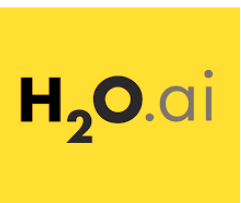

In [ ]:
#import packages
import numpy as np
import pandas as pd 
#import matplotlib as mpl
import h2o
from h2o.automl import H2OAutoML
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
h2o.init()

In [ ]:
#import train test files
train = h2o.import_file('../input/tabular-playground-series-jun-2021/train.csv')
test = h2o.import_file('../input/tabular-playground-series-jun-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
#desscribe dataset
train.describe()

In [ ]:
x = train.columns
y = "target"
x.remove(y)
x.remove("id") #removing id  

** #feature distribution using hist **


Visulaizaton 

In [ ]:
for col in x:train[col].hist()

Now let us also look at the correlation of the individual features. We can use the cor() function in H2OFrame for the same

In [ ]:
plt.figure(figsize=(15,15))
corr = train[:,0:10].cor().as_data_frame()
corr.index = train.columns[0:10]
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
aml = H2OAutoML(max_runtime_secs=200, seed=1)
aml.train(x=x, y=y, training_frame=train)

In [ ]:
lb = aml.leaderboard
lb.head()

In [ ]:
preds = aml.predict(test)

In [ ]:
preds.as_data_frame().values

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
metalearner.coef_norm()

In [ ]:
## create submission
submission = pd.concat([
    pd.DataFrame({'id': test['id'].as_data_frame().id}),
    preds.as_data_frame().drop('predict', axis=1)
], axis=1)

submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)